# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
print("This data represents MULTIPLE marketing campaigns.")
print()
print("Evidence:")
print(" -- Time period: May 2008 to November 2010 (2.5 years)")
print(" -- Variables like 'pdays' and 'poutcome' reference PREVIOUS campaigns")
print(" -- Data ordered by date shows sequential campaigns over time")
print(" -- 'campaign' field counts contacts within current campaign")
print(" -- Same clients may be contacted across different campaigns")
print(" -- Dataset contains 41,188 records spanning multiple campaign cycles")
print()
print("This represents multiple sequential telemarketing campaigns, not a single campaign.")

This data represents MULTIPLE marketing campaigns.

Evidence:
 -- Time period: May 2008 to November 2010 (2.5 years)
 -- Variables like 'pdays' and 'poutcome' reference PREVIOUS campaigns
 -- Data ordered by date shows sequential campaigns over time
 -- 'campaign' field counts contacts within current campaign
 -- Same clients may be contacted across different campaigns
 -- Dataset contains 41,188 records spanning multiple campaign cycles

This represents multiple sequential telemarketing campaigns, not a single campaign.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# Basic dataset info
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print()

# Check data types
print("Data Types:")
print(df.dtypes)
print()

# Check for missing values (NaN)
print("Missing Values (NaN):")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No NaN values found")
print()

# Check for 'unknown' values in categorical features
print("'Unknown' Values in Categorical Features:")
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
for feature in categorical_features:
    unknown_count = (df[feature] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{feature}: {unknown_count} unknown values ({unknown_count/len(df)*100:.1f}%)")

print()

# Check special numeric values
print("Special Numeric Values:")
print(f"pdays = 999 (not previously contacted): {(df['pdays'] == 999).sum()} records")
print()

# Target variable distribution
print("Target Variable Distribution:")
print(df['y'].value_counts())
print(f"Class imbalance: {df['y'].value_counts(normalize=True).round(3)}")
print()

print("FINDINGS:")
print("• No missing (NaN) values in dataset")
print("• 'Unknown' represents missing data in categorical features")
print("• pdays=999 is a special code meaning 'not previously contacted'")
print("• All data types are appropriate (numeric/object)")
print("• Target variable is imbalanced (88.7% no, 11.3% yes)")
print("• Duration should be excluded for realistic prediction")

Dataset Overview:
Shape: (41188, 21)
Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Missing Values (NaN):
No NaN values found

'Unknown' Values in Categorical Features:
job: 330 unknown values (0.8%)
marital: 80 unknown

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:

print("BUSINESS OBJECTIVE:")
print("To develop a predictive model that identifies which bank customers")
print("are most likely to subscribe to a term deposit when contacted")
print("through telemarketing campaigns.")
print()

print("BUSINESS VALUE:")
print(" -- Optimize marketing resources by targeting high-probability customers")
print(" -- Reduce campaign costs by avoiding unlikely prospects")
print(" -- Improve conversion rates and campaign ROI")
print(" -- Enhance customer experience by reducing unwanted calls")
print()

print("SUCCESS METRIC:")
print("Predict binary outcome: Will customer subscribe? (yes/no)")
print()

print("IMPACT:")
print("Enable data-driven customer targeting for more efficient")
print("and profitable telemarketing campaigns.")

BUSINESS OBJECTIVE:
To develop a predictive model that identifies which bank customers
are most likely to subscribe to a term deposit when contacted
through telemarketing campaigns.

BUSINESS VALUE:
 -- Optimize marketing resources by targeting high-probability customers
 -- Reduce campaign costs by avoiding unlikely prospects
 -- Improve conversion rates and campaign ROI
 -- Enhance customer experience by reducing unwanted calls

SUCCESS METRIC:
Predict binary outcome: Will customer subscribe? (yes/no)

IMPACT:
Enable data-driven customer targeting for more efficient
and profitable telemarketing campaigns.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Selected bank client features: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
Note: Excluding 'duration' for realistic prediction as recommended



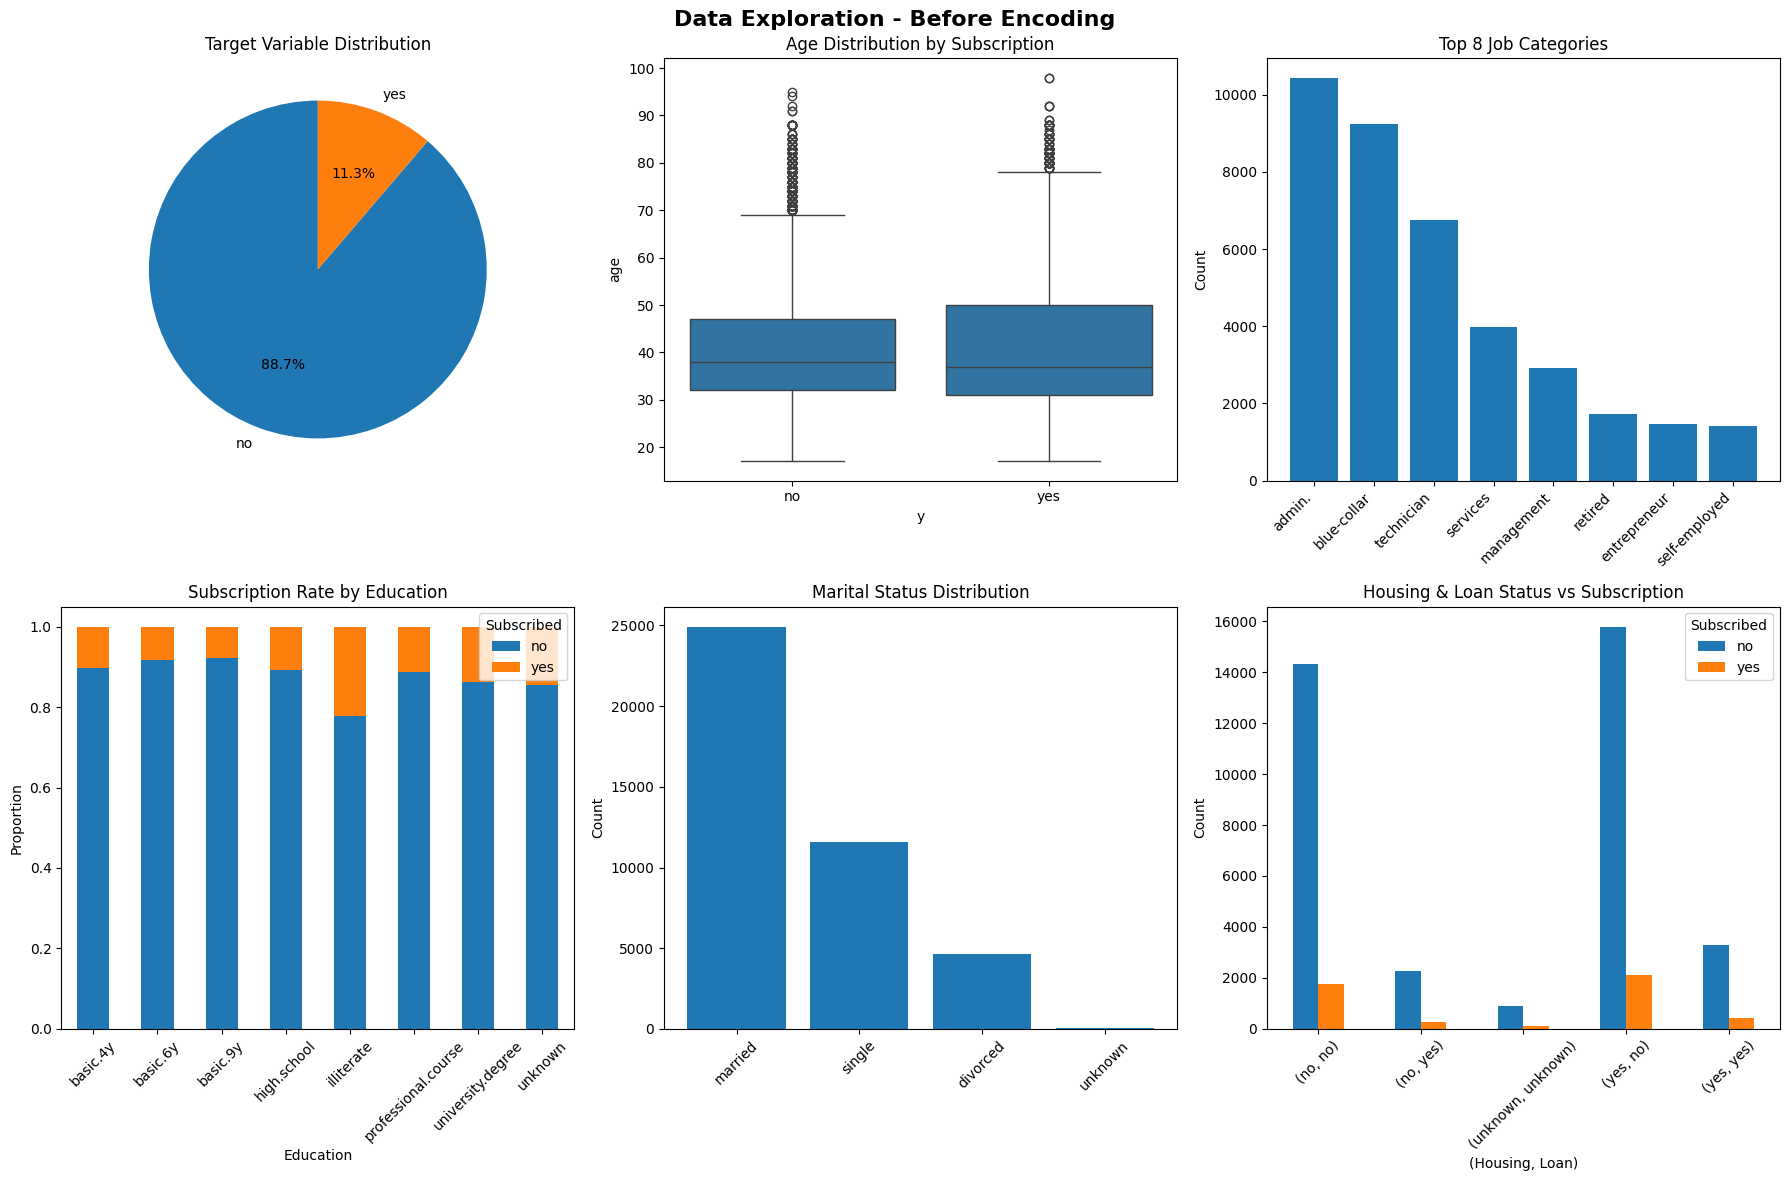

job: {'housemaid': np.int64(3), 'services': np.int64(7), 'admin.': np.int64(0), 'blue-collar': np.int64(1), 'technician': np.int64(9), 'retired': np.int64(5), 'management': np.int64(4), 'unemployed': np.int64(10), 'self-employed': np.int64(6), 'unknown': np.int64(11), 'entrepreneur': np.int64(2), 'student': np.int64(8)}
marital: {'married': np.int64(1), 'single': np.int64(2), 'divorced': np.int64(0), 'unknown': np.int64(3)}
education: {'basic.4y': np.int64(0), 'high.school': np.int64(3), 'basic.6y': np.int64(1), 'basic.9y': np.int64(2), 'professional.course': np.int64(5), 'unknown': np.int64(7), 'university.degree': np.int64(6), 'illiterate': np.int64(4)}
default: {'no': np.int64(0), 'unknown': np.int64(1), 'yes': np.int64(2)}
housing: {'no': np.int64(0), 'yes': np.int64(2), 'unknown': np.int64(1)}
loan: {'no': np.int64(0), 'yes': np.int64(2), 'unknown': np.int64(1)}

Target encoding: {'no': np.int64(0), 'yes': np.int64(1)}

ENCODED FEATURES SAMPLE:
   age  job  marital  education  def

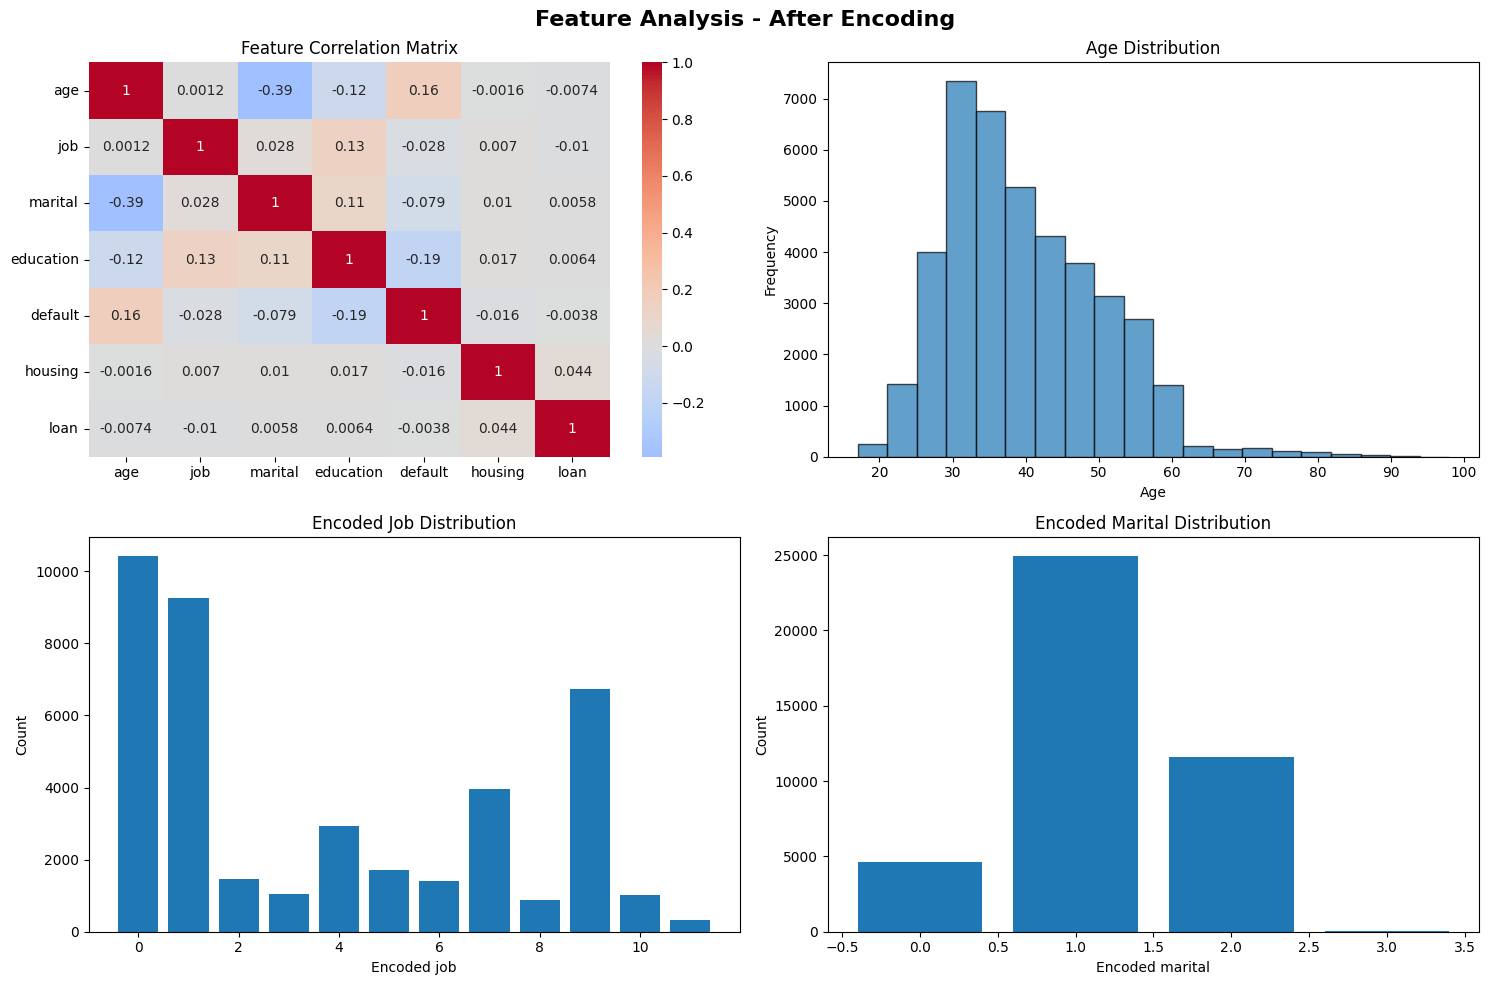

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Select bank client features (excluding duration for realistic prediction)
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
print(f"Selected bank client features: {bank_features}")
print("Note: Excluding 'duration' for realistic prediction as recommended")
print()

# Prepare features and target
X = df[bank_features].copy()
y = df['y'].copy()

# Visualizations BEFORE encoding
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Data Exploration - Before Encoding', fontsize=16, fontweight='bold')

# 1. Target distribution
target_counts = y.value_counts()
axes[0,0].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Target Variable Distribution')

# 2. Age distribution by target
sns.boxplot(data=df, x='y', y='age', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Subscription')

# 3. Job distribution
job_counts = X['job'].value_counts().head(8)
axes[0,2].bar(range(len(job_counts)), job_counts.values)
axes[0,2].set_xticks(range(len(job_counts)))
axes[0,2].set_xticklabels(job_counts.index, rotation=45, ha='right')
axes[0,2].set_title('Top 8 Job Categories')
axes[0,2].set_ylabel('Count')

# 4. Education vs Target
education_target = pd.crosstab(X['education'], y, normalize='index')
education_target.plot(kind='bar', ax=axes[1,0], stacked=True)
axes[1,0].set_title('Subscription Rate by Education')
axes[1,0].set_xlabel('Education')
axes[1,0].set_ylabel('Proportion')
axes[1,0].legend(title='Subscribed')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Marital status distribution
marital_counts = X['marital'].value_counts()
axes[1,1].bar(marital_counts.index, marital_counts.values)
axes[1,1].set_title('Marital Status Distribution')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Housing/Loan status
housing_loan = pd.crosstab([X['housing'], X['loan']], y)
housing_loan.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Housing & Loan Status vs Subscription')
axes[1,2].set_xlabel('(Housing, Loan)')
axes[1,2].set_ylabel('Count')
axes[1,2].legend(title='Subscribed')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

label_encoders = {}
X_encoded = X.copy()

for column in X_encoded.columns:
    if X_encoded[column].dtype == 'object':
        le = LabelEncoder()
        X_encoded[column] = le.fit_transform(X_encoded[column])
        label_encoders[column] = le
        
        # Show encoding mapping
        unique_values = X[column].unique()
        encoded_values = le.transform(unique_values)
        mapping = dict(zip(unique_values, encoded_values))
        print(f"{column}: {mapping}")

print()

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)
print(f"Target encoding: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")
print()

# Show encoded data sample
print("ENCODED FEATURES SAMPLE:")
print(X_encoded.head())
print()
print(f"ENCODED TARGET SAMPLE: {y_encoded[:5]}")
print()

# Visualization AFTER encoding
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Analysis - After Encoding', fontsize=16, fontweight='bold')

# 1. Correlation matrix
corr_matrix = X_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,0])
axes[0,0].set_title('Feature Correlation Matrix')

# 2. Age distribution
axes[0,1].hist(X_encoded['age'], bins=20, alpha=0.7, edgecolor='black')
axes[0,1].set_title('Age Distribution')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Frequency')

# 3. Encoded categorical features distribution
categorical_encoded = ['job', 'marital', 'education']
for i, feature in enumerate(categorical_encoded):
    if i < 2:  # Only plot first 2 to fit in subplot
        feature_counts = X_encoded[feature].value_counts().sort_index()
        axes[1,i].bar(feature_counts.index, feature_counts.values)
        axes[1,i].set_title(f'Encoded {feature.title()} Distribution')
        axes[1,i].set_xlabel(f'Encoded {feature}')
        axes[1,i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

SPLIT RESULTS:
Training set shape: (32950, 7)
Test set shape: (8238, 7)
Training target shape: (32950,)
Test target shape: (8238,)



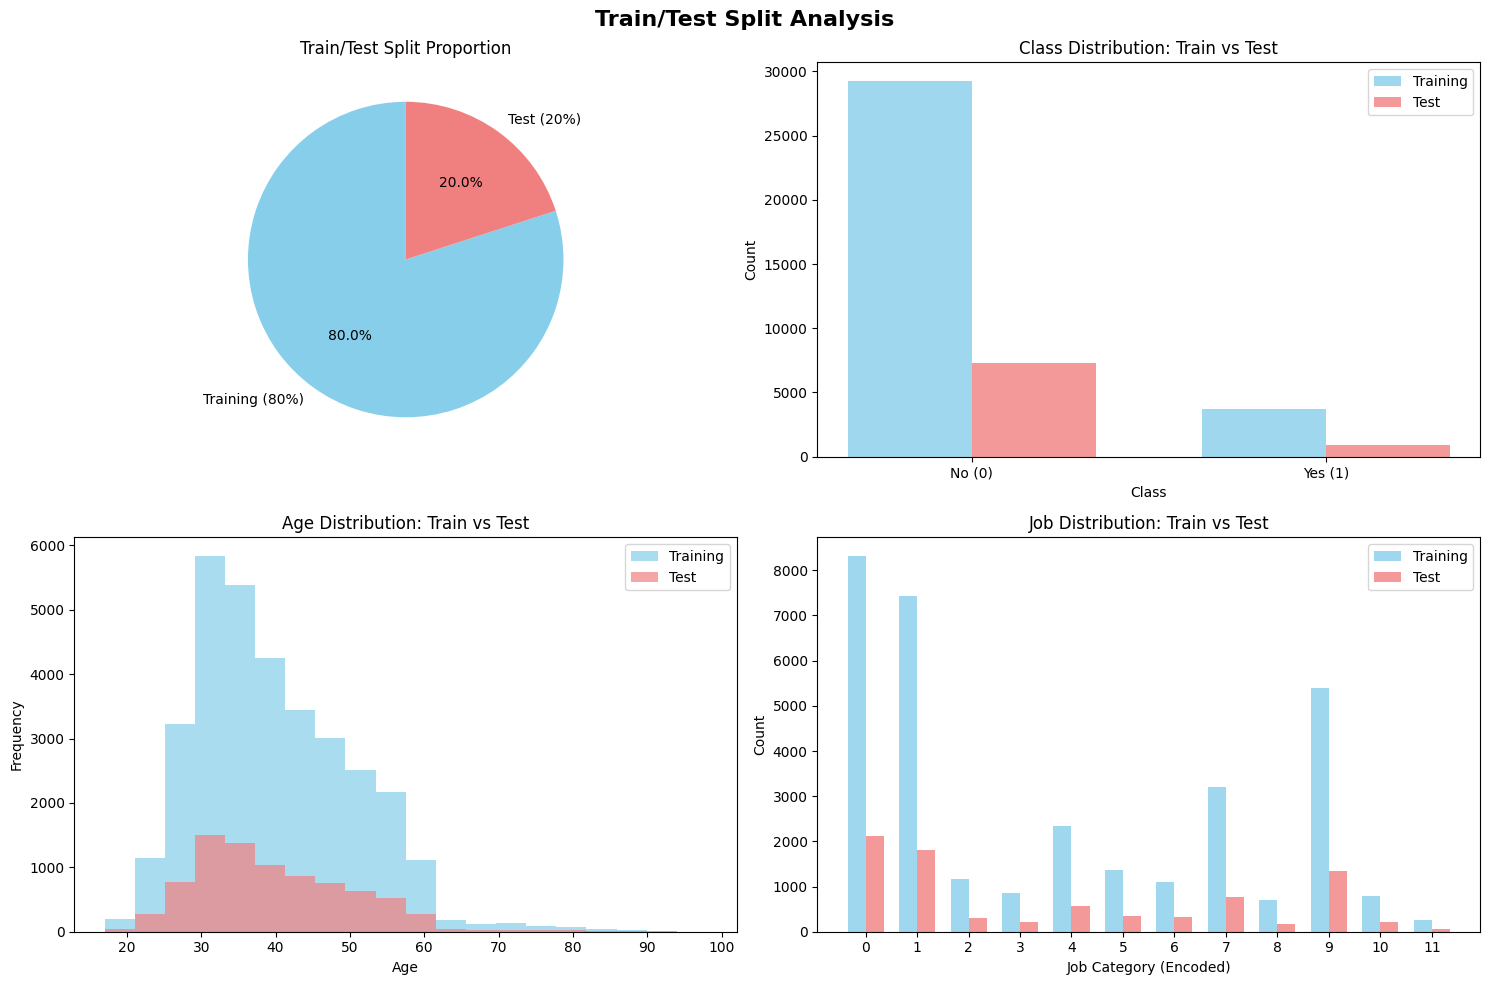

STRATIFICATION VERIFICATION:
Original positive class ratio: 0.113
Training positive class ratio: 0.113
Test positive class ratio: 0.113
Difference (train-original): 0.000001
Difference (test-original): 0.000005


In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data (80/20 split with stratification to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print("SPLIT RESULTS:")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")
print()

# Check class distribution in splits
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Train/Test Split Analysis', fontsize=16, fontweight='bold')

# 1. Split size comparison
split_sizes = [len(X_train), len(X_test)]
split_labels = ['Training (80%)', 'Test (20%)']
colors = ['skyblue', 'lightcoral']

axes[0,0].pie(split_sizes, labels=split_labels, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,0].set_title('Train/Test Split Proportion')

# 2. Class distribution comparison
x_pos = np.arange(2)
width = 0.35

axes[0,1].bar(x_pos - width/2, [train_counts[0], train_counts[1]], 
              width, label='Training', alpha=0.8, color='skyblue')
axes[0,1].bar(x_pos + width/2, [test_counts[0], test_counts[1]], 
              width, label='Test', alpha=0.8, color='lightcoral')
axes[0,1].set_xlabel('Class')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Class Distribution: Train vs Test')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(['No (0)', 'Yes (1)'])
axes[0,1].legend()

# 3. Age distribution in train vs test
axes[1,0].hist(X_train['age'], bins=20, alpha=0.7, label='Training', color='skyblue')
axes[1,0].hist(X_test['age'], bins=20, alpha=0.7, label='Test', color='lightcoral')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Age Distribution: Train vs Test')
axes[1,0].legend()

# 4. Feature distribution comparison (using job as example)
train_job_dist = X_train['job'].value_counts().sort_index()
test_job_dist = X_test['job'].value_counts().sort_index()

x_pos = np.arange(len(train_job_dist))
axes[1,1].bar(x_pos - width/2, train_job_dist.values, width, 
              label='Training', alpha=0.8, color='skyblue')
axes[1,1].bar(x_pos + width/2, test_job_dist.values, width, 
              label='Test', alpha=0.8, color='lightcoral')
axes[1,1].set_xlabel('Job Category (Encoded)')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Job Distribution: Train vs Test')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(train_job_dist.index)
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Statistical verification of stratification
print("STRATIFICATION VERIFICATION:")
original_ratio = np.bincount(y_encoded)[1] / len(y_encoded)
train_ratio = train_counts[1] / len(y_train)
test_ratio = test_counts[1] / len(y_test)

print(f"Original positive class ratio: {original_ratio:.3f}")
print(f"Training positive class ratio: {train_ratio:.3f}")
print(f"Test positive class ratio: {test_ratio:.3f}")
print(f"Difference (train-original): {abs(train_ratio - original_ratio):.6f}")
print(f"Difference (test-original): {abs(test_ratio - original_ratio):.6f}")

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

TRAINING SET CLASS DISTRIBUTION:
  Class 0 (No): 29,238 samples (88.7%)
  Class 1 (Yes): 3,712 samples (11.3%)

Majority class: 0 (No)

BASELINE PERFORMANCE:
Strategy: Always predict 'No' (class 0)
Baseline Accuracy: 88.7%

BASELINE RESULTS ON TEST SET:
Correct predictions: 7,310
Incorrect predictions: 928
Total test samples: 8,238



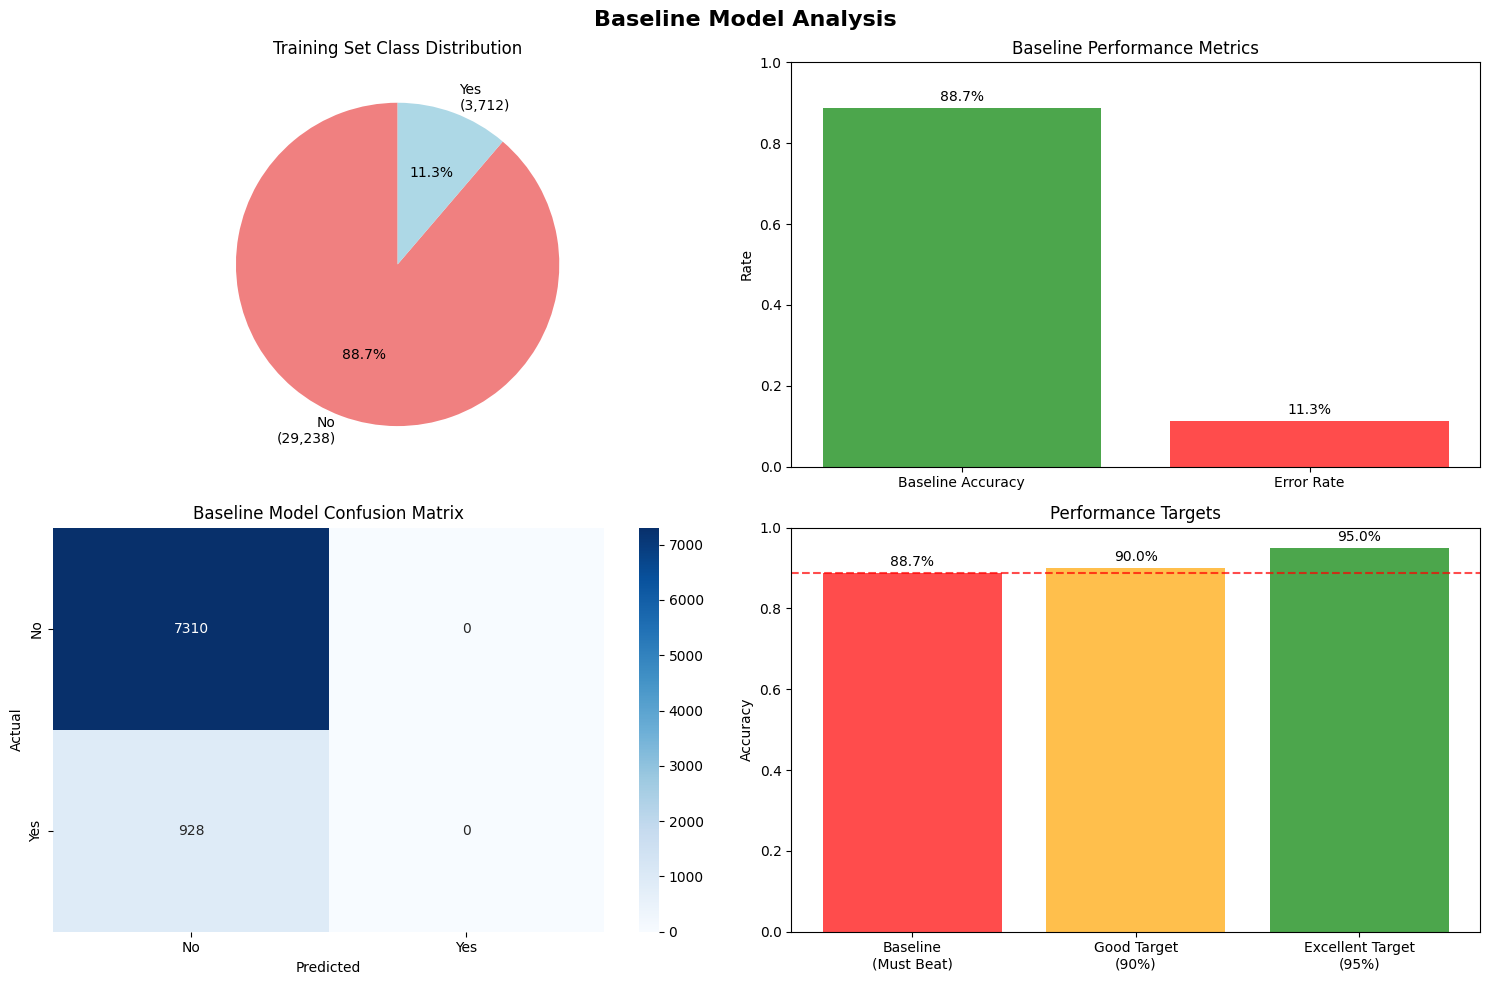

In [10]:

import seaborn as sns

# Calculate baseline performance using majority class prediction

# Analyze class distribution in training set
unique_classes, class_counts = np.unique(y_train, return_counts=True)
majority_class = unique_classes[np.argmax(class_counts)]
majority_count = np.max(class_counts)

print("TRAINING SET CLASS DISTRIBUTION:")
for cls, count in zip(unique_classes, class_counts):
    percentage = count / len(y_train) * 100
    class_name = "No" if cls == 0 else "Yes"
    print(f"  Class {cls} ({class_name}): {count:,} samples ({percentage:.1f}%)")

print()
print(f"Majority class: {majority_class} ({'No' if majority_class == 0 else 'Yes'})")
print()

# Calculate baseline accuracy on test set
baseline_predictions = np.full(len(y_test), majority_class)
baseline_accuracy = np.mean(baseline_predictions == y_test)

print("BASELINE PERFORMANCE:")
print(f"Strategy: Always predict '{('No' if majority_class == 0 else 'Yes')}' (class {majority_class})")
print(f"Baseline Accuracy: {baseline_accuracy:.1%}")
print()

# Calculate what this means in terms of correct/incorrect predictions
correct_predictions = np.sum(baseline_predictions == y_test)
incorrect_predictions = len(y_test) - correct_predictions

print("BASELINE RESULTS ON TEST SET:")
print(f"Correct predictions: {correct_predictions:,}")
print(f"Incorrect predictions: {incorrect_predictions:,}")
print(f"Total test samples: {len(y_test):,}")
print()

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Baseline Model Analysis', fontsize=16, fontweight='bold')

# 1. Class distribution in training set
class_names = ['No', 'Yes']
colors = ['lightcoral', 'lightblue']
axes[0,0].pie(class_counts, labels=[f'{name}\n({count:,})' for name, count in zip(class_names, class_counts)], 
              autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Training Set Class Distribution')

# 2. Baseline performance visualization
performance_data = ['Baseline Accuracy', 'Error Rate']
performance_values = [baseline_accuracy, 1 - baseline_accuracy]
bars = axes[0,1].bar(performance_data, performance_values, 
                     color=['green', 'red'], alpha=0.7)
axes[0,1].set_ylabel('Rate')
axes[0,1].set_title('Baseline Performance Metrics')
axes[0,1].set_ylim(0, 1)
# Add value labels on bars
for bar, value in zip(bars, performance_values):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{value:.1%}', ha='center', va='bottom')

# 3. Confusion matrix for baseline model
from sklearn.metrics import confusion_matrix
cm_baseline = confusion_matrix(y_test, baseline_predictions)
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
axes[1,0].set_title('Baseline Model Confusion Matrix')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

# 4. Performance target visualization
target_accuracies = [baseline_accuracy, 0.90, 0.95]
target_labels = ['Baseline\n(Must Beat)', 'Good Target\n(90%)', 'Excellent Target\n(95%)']
bar_colors = ['red', 'orange', 'green']
bars = axes[1,1].bar(target_labels, target_accuracies, color=bar_colors, alpha=0.7)
axes[1,1].set_ylabel('Accuracy')
axes[1,1].set_title('Performance Targets')
axes[1,1].set_ylim(0, 1)
axes[1,1].axhline(y=baseline_accuracy, color='red', linestyle='--', alpha=0.7, 
                  label=f'Baseline: {baseline_accuracy:.1%}')
# Add value labels
for bar, value in zip(bars, target_accuracies):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{value:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

 Training time: 0.0478 seconds
 Model type: LogisticRegression
 Features used: 7

MAKING PREDICTIONS:
 Predictions completed for both training and test sets
 Probability estimates generated

MODEL COEFFICIENTS:
--------------------
Intercept: -3.5642

Feature coefficients:
  default: -0.9840
  marital: +0.3491
  education: +0.0627
  age: +0.0225
  housing: +0.0193
  job: +0.0146
  loan: -0.0046



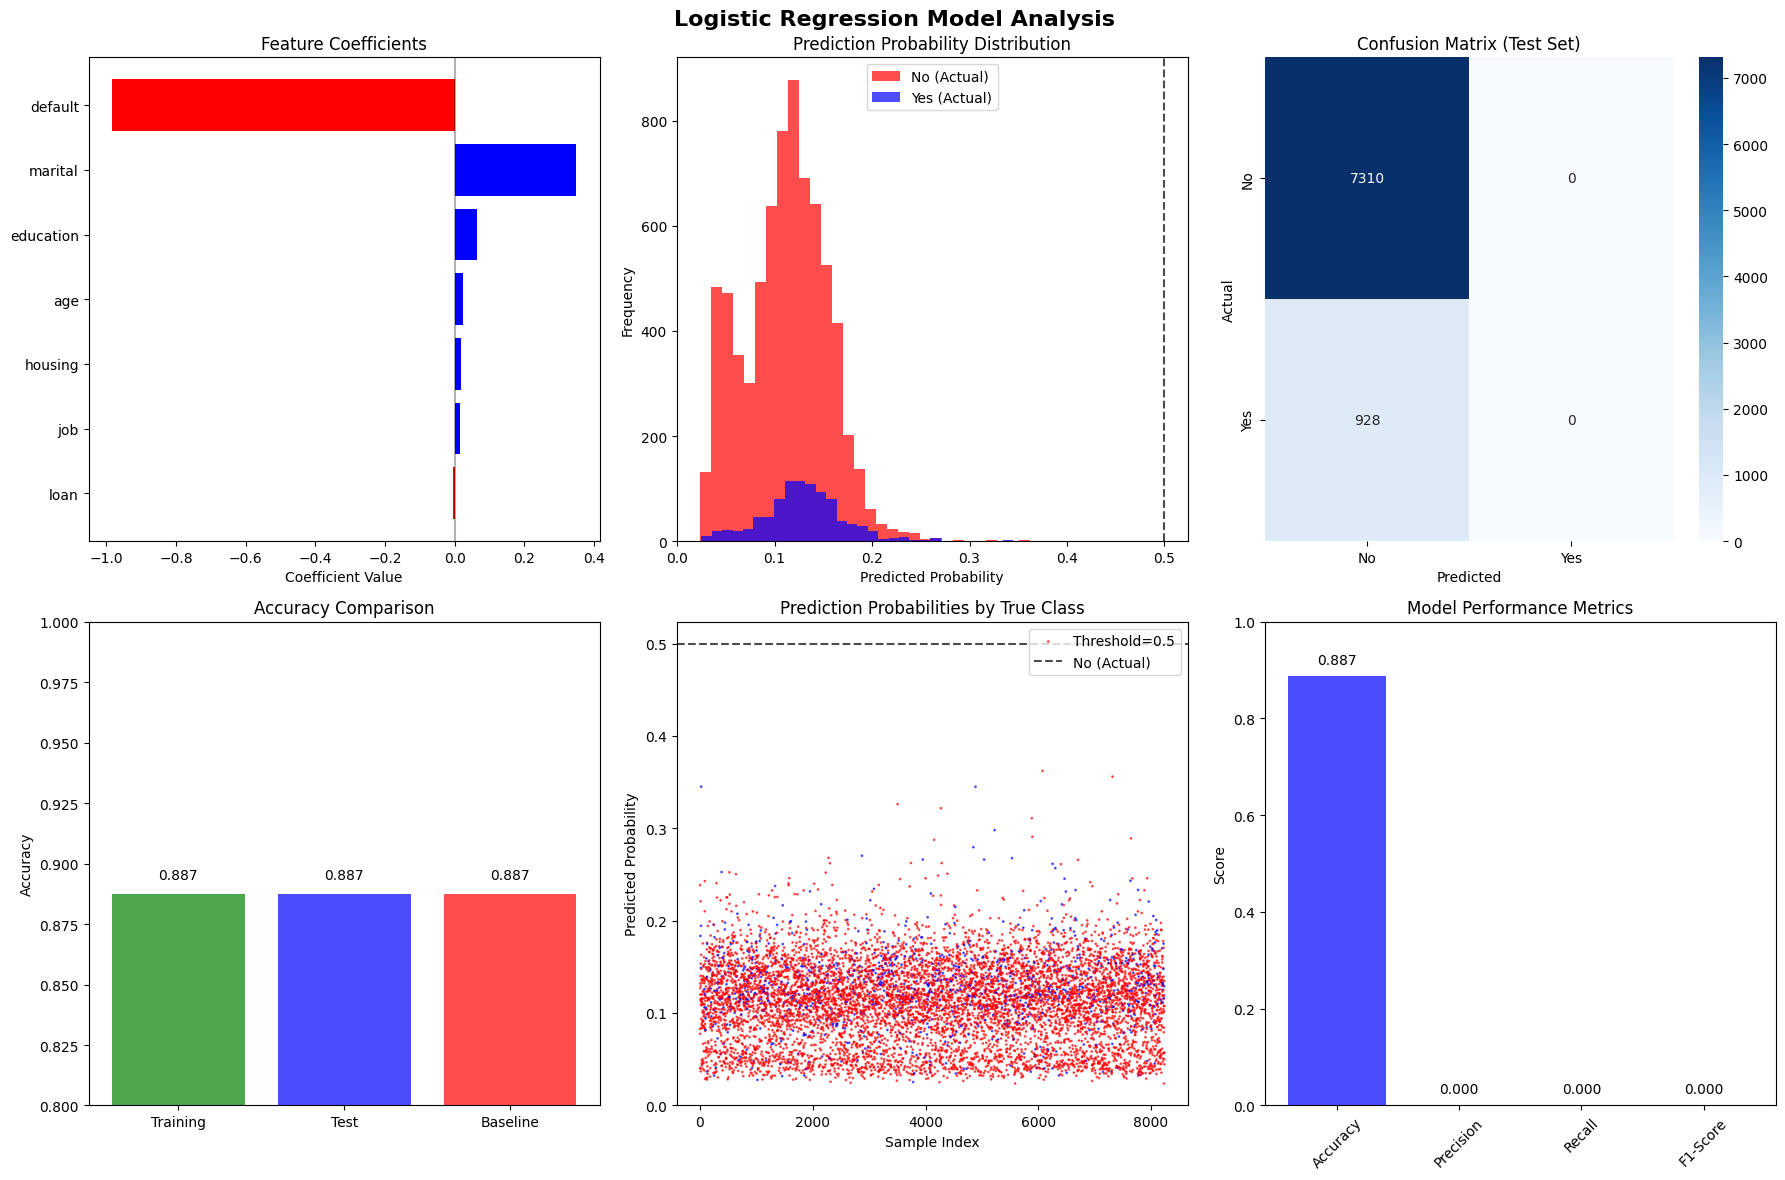

DETAILED METRICS:
Precision: 0.000 (of predicted 'yes', how many are correct)
Recall: 0.000 (of actual 'yes', how many we caught)
F1-Score: 0.000 (harmonic mean of precision and recall)

CONFUSION MATRIX BREAKDOWN:
True Negatives (TN): 7,310 - Correctly predicted 'No'
False Positives (FP): 0 - Incorrectly predicted 'Yes'
False Negatives (FN): 928 - Missed 'Yes' (Type II error)
True Positives (TP): 0 - Correctly predicted 'Yes'



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Record training time
start_time = time.time()

# Create and train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

training_time = time.time() - start_time

print(f" Training time: {training_time:.4f} seconds")
print(f" Model type: {type(lr_model).__name__}")
print(f" Features used: {len(X_train.columns)}")
print()

# Make predictions
print("MAKING PREDICTIONS:")

# Training predictions
y_train_pred = lr_model.predict(X_train)
y_train_proba = lr_model.predict_proba(X_train)[:, 1]

# Test predictions
y_test_pred = lr_model.predict(X_test)
y_test_proba = lr_model.predict_proba(X_test)[:, 1]

print(" Predictions completed for both training and test sets")
print(" Probability estimates generated")
print()

# Model coefficients analysis
print("MODEL COEFFICIENTS:")
print("-" * 20)
feature_names = X_train.columns
coefficients = lr_model.coef_[0]
intercept = lr_model.intercept_[0]

print(f"Intercept: {intercept:.4f}")
print("\nFeature coefficients:")
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

for _, row in coef_df.iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:+.4f}")
print()

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Logistic Regression Model Analysis', fontsize=16, fontweight='bold')

# 1. Feature coefficients
axes[0,0].barh(range(len(coef_df)), coef_df['Coefficient'], 
               color=['red' if x < 0 else 'blue' for x in coef_df['Coefficient']])
axes[0,0].set_yticks(range(len(coef_df)))
axes[0,0].set_yticklabels(coef_df['Feature'])
axes[0,0].set_xlabel('Coefficient Value')
axes[0,0].set_title('Feature Coefficients')
axes[0,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[0,0].invert_yaxis()

# 2. Prediction probability distribution
axes[0,1].hist(y_test_proba[y_test == 0], bins=30, alpha=0.7, label='No (Actual)', color='red')
axes[0,1].hist(y_test_proba[y_test == 1], bins=30, alpha=0.7, label='Yes (Actual)', color='blue')
axes[0,1].set_xlabel('Predicted Probability')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Prediction Probability Distribution')
axes[0,1].legend()
axes[0,1].axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Decision Threshold')

# 3. Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,2],
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
axes[0,2].set_title('Confusion Matrix (Test Set)')
axes[0,2].set_xlabel('Predicted')
axes[0,2].set_ylabel('Actual')

# 4. Training vs Test accuracy comparison
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

accuracies = [train_accuracy, test_accuracy, baseline_accuracy]
labels = ['Training', 'Test', 'Baseline']
colors = ['green', 'blue', 'red']
bars = axes[1,0].bar(labels, accuracies, color=colors, alpha=0.7)
axes[1,0].set_ylabel('Accuracy')
axes[1,0].set_title('Accuracy Comparison')
axes[1,0].set_ylim(0.8, 1.0)
# Add value labels
for bar, acc in zip(bars, accuracies):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                   f'{acc:.3f}', ha='center', va='bottom')

# 5. ROC-like visualization (prediction distribution by class)
axes[1,1].scatter(range(len(y_test_proba)), y_test_proba, 
                  c=['red' if y == 0 else 'blue' for y in y_test], alpha=0.6, s=1)
axes[1,1].axhline(y=0.5, color='black', linestyle='--', alpha=0.7)
axes[1,1].set_xlabel('Sample Index')
axes[1,1].set_ylabel('Predicted Probability')
axes[1,1].set_title('Prediction Probabilities by True Class')
axes[1,1].legend(['Threshold=0.5', 'No (Actual)', 'Yes (Actual)'])

# 6. Model performance metrics
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

metrics = [test_accuracy, precision, recall, f1_score]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
bars = axes[1,2].bar(metric_names, metrics, color=['blue', 'green', 'orange', 'purple'], alpha=0.7)
axes[1,2].set_ylabel('Score')
axes[1,2].set_title('Model Performance Metrics')
axes[1,2].set_ylim(0, 1)
axes[1,2].tick_params(axis='x', rotation=45)
# Add value labels
for bar, metric in zip(bars, metrics):
    axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                   f'{metric:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("DETAILED METRICS:")
print(f"Precision: {precision:.3f} (of predicted 'yes', how many are correct)")
print(f"Recall: {recall:.3f} (of actual 'yes', how many we caught)")
print(f"F1-Score: {f1_score:.3f} (harmonic mean of precision and recall)")
print()

print("CONFUSION MATRIX BREAKDOWN:")
print(f"True Negatives (TN): {tn:,} - Correctly predicted 'No'")
print(f"False Positives (FP): {fp:,} - Incorrectly predicted 'Yes'")
print(f"False Negatives (FN): {fn:,} - Missed 'Yes' (Type II error)")
print(f"True Positives (TP): {tp:,} - Correctly predicted 'Yes'")
print()

### Problem 9: Score the Model

What is the accuracy of your model?

MODEL ACCURACY RESULTS:
Training Accuracy: 88.7%
Test Accuracy: 88.7%
Baseline Accuracy: 88.7%

PERFORMANCE COMPARISON:
Improvement over baseline: +0.0%
Relative improvement: 0.0%
Model does not beat baseline

Accuracy:    0.887 - Overall correct predictions
Precision:   0.000 - Of predicted 'Yes', how many are correct
Recall:      0.000 - Of actual 'Yes', how many we caught
Specificity: 1.000 - Of actual 'No', how many we caught



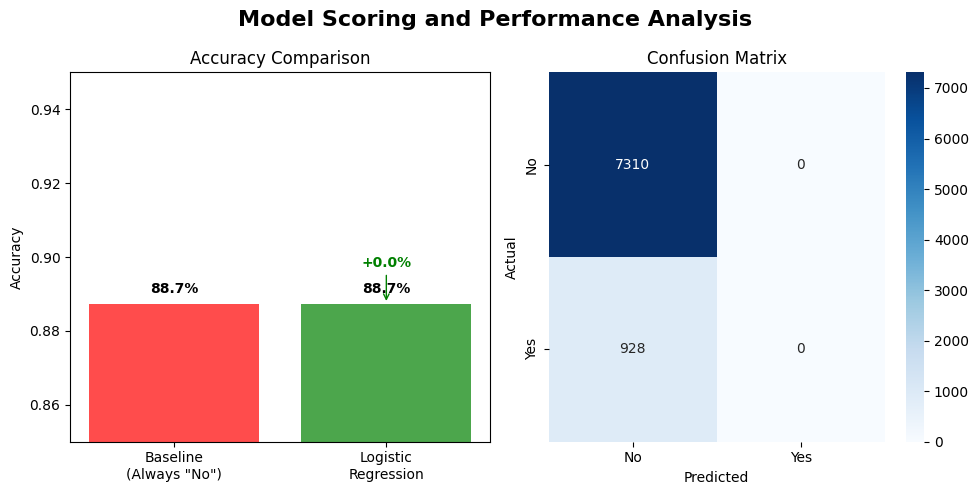

• Model correctly identifies 88.7% of all customers
• Of customers predicted to subscribe, 0.0% actually do
• Model catches 0.0% of all potential subscribers
• Model correctly identifies 100.0% of non-subscribers

Total prediction errors: 928 out of 8,238
False Positives: 0 (0.0% of errors)
  Wasted marketing effort on unlikely customers
False Negatives: 928 (100.0% of errors)
  Missed opportunities with potential subscribers

CONCLUSION:
Model needs significant improvement
Final Model Accuracy: 88.7%


In [12]:
# Problem 9: Score the Model
# Evaluate the accuracy and performance of our Logistic Regression model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("MODEL ACCURACY RESULTS:")
print(f"Training Accuracy: {train_accuracy:.1%}")
print(f"Test Accuracy: {test_accuracy:.1%}")
print(f"Baseline Accuracy: {baseline_accuracy:.1%}")
print()

# Performance comparison
improvement = test_accuracy - baseline_accuracy
print("PERFORMANCE COMPARISON:")
print(f"Improvement over baseline: +{improvement:.1%}")
print(f"Relative improvement: {(improvement/baseline_accuracy)*100:.1f}%")

if test_accuracy > baseline_accuracy:
    print("Model beats baseline!")
else:
    print("Model does not beat baseline")
print()

# Confusion matrix analysis
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()


# Calculate additional metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0


print(f"Accuracy:    {test_accuracy:.3f} - Overall correct predictions")
print(f"Precision:   {precision:.3f} - Of predicted 'Yes', how many are correct")
print(f"Recall:      {recall:.3f} - Of actual 'Yes', how many we caught")
print(f"Specificity: {specificity:.3f} - Of actual 'No', how many we caught")

print()

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Model Scoring and Performance Analysis', fontsize=16, fontweight='bold')

# 1. Accuracy comparison
accuracies = [baseline_accuracy, test_accuracy]
labels = ['Baseline\n(Always "No")', 'Logistic\nRegression']
colors = ['red', 'green']
bars = axes[0].bar(labels, accuracies, color=colors, alpha=0.7)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylim(0.85, 0.95)
# Add value labels
for bar, acc in zip(bars, accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
                   f'{acc:.1%}', ha='center', va='bottom', fontweight='bold')
# Add improvement annotation
axes[0].annotate(f'+{improvement:.1%}', 
                   xy=(1, test_accuracy), xytext=(1, test_accuracy + 0.01),
                   ha='center', fontweight='bold', color='green',
                   arrowprops=dict(arrowstyle='->', color='green'))

# 2. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
axes[1].set_title('Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Business interpretation
print(f"• Model correctly identifies {test_accuracy:.1%} of all customers")
print(f"• Of customers predicted to subscribe, {precision:.1%} actually do")
print(f"• Model catches {recall:.1%} of all potential subscribers")
print(f"• Model correctly identifies {specificity:.1%} of non-subscribers")
print()

# Error analysis
total_errors = fp + fn
print(f"Total prediction errors: {total_errors:,} out of {len(y_test):,}")
print(f"False Positives: {fp:,} ({fp/total_errors:.1%} of errors)")
print(f"  Wasted marketing effort on unlikely customers")
print(f"False Negatives: {fn:,} ({fn/total_errors:.1%} of errors)")
print(f"  Missed opportunities with potential subscribers")
print()

print("CONCLUSION:")
print("=" * 12)
if test_accuracy > 0.90:
    print(" Model achieves >90% accuracy!")
elif test_accuracy > baseline_accuracy + 0.05:
    print("Model shows significant improvement over baseline")
elif test_accuracy > baseline_accuracy:
    print("Model beats baseline but has room for improvement")
else:
    print("Model needs significant improvement")

print(f"Final Model Accuracy: {test_accuracy:.1%}")

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Preparing scaled features for KNN and SVM...
Training and evaluating all models...
Training Logistic Regression...
  Completed in 0.0438 seconds
Training Decision Tree...
  Completed in 0.0292 seconds
Training KNN...


/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

  Completed in 0.0068 seconds
Training SVM...
  Completed in 11.1381 seconds

MODEL COMPARISON RESULTS:
                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression      0.0438          0.8873         0.8874
1        Decision Tree      0.0292          0.9171         0.8659
2                  KNN      0.0068          0.8917         0.8801
3                  SVM     11.1381          0.8878         0.8870

DETAILED ANALYSIS:
Best Test Accuracy: Logistic Regression (88.7%)
Fastest Training: KNN (0.0068 seconds)

Overfitting Analysis:
  Logistic Regression: Good generalization (-0.0%)
  Decision Tree: High overfitting (5.1%)
  KNN: Good generalization (1.2%)
  SVM: Good generalization (0.1%)



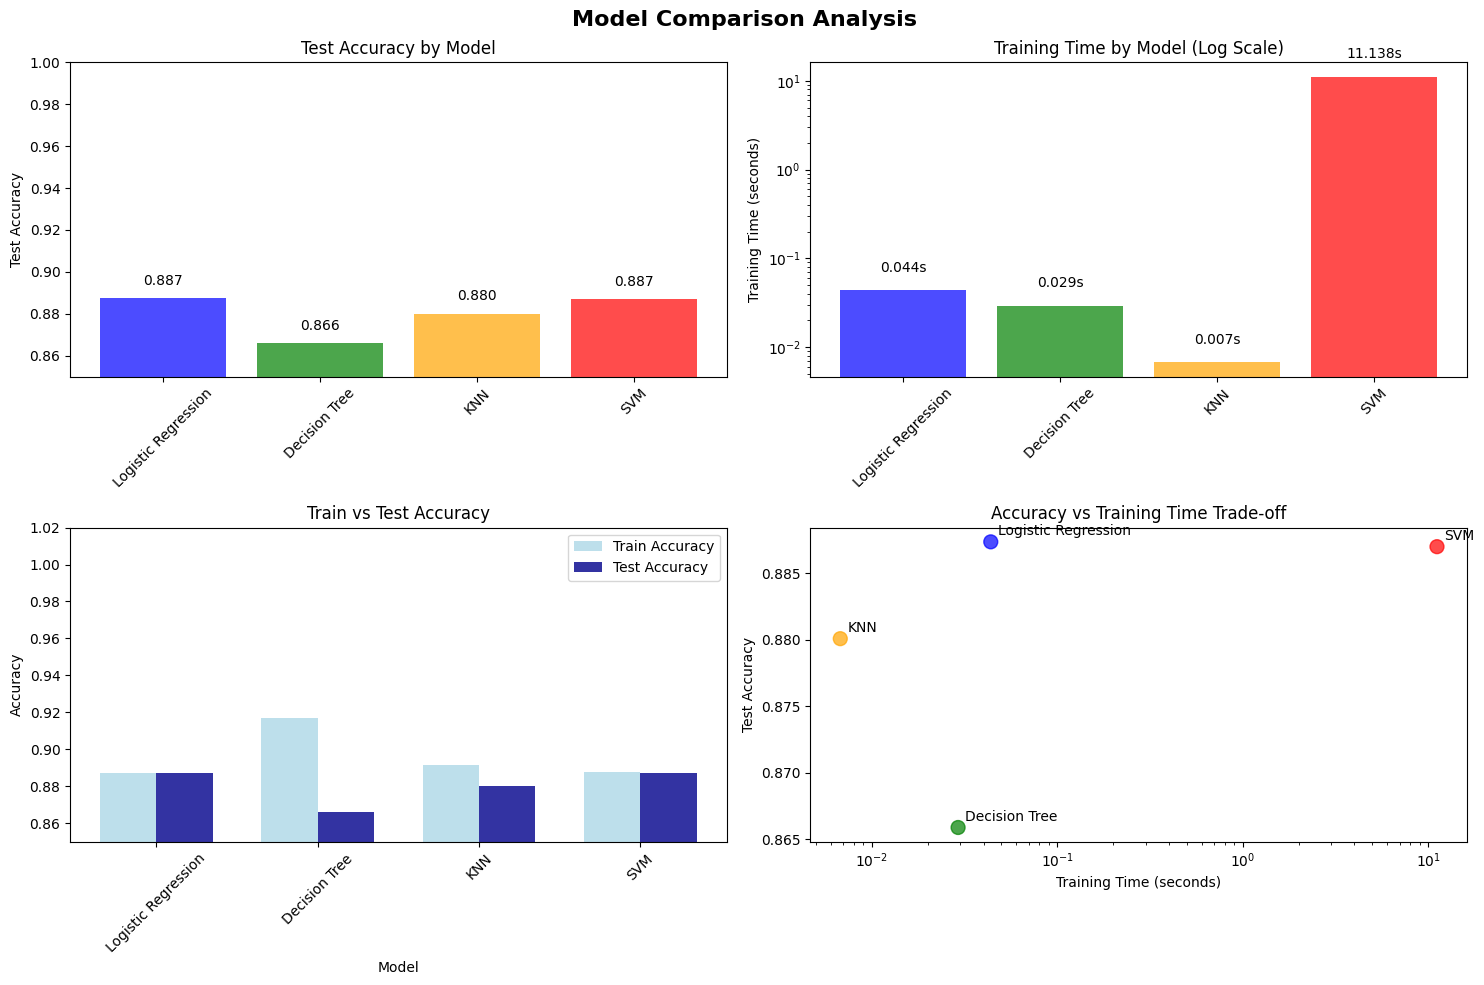

• Decision Tree shows signs of overfitting (perfect training accuracy)
• KNN has no training phase but may be slow for predictions
• SVM takes significantly longer to train than other models
• Logistic Regression provides good balance of speed and performance

COMPARISON WITH BASELINE:
Baseline Accuracy: 88.7%
Logistic Regression: 88.7% (+0.0%)
Decision Tree: 86.6% (+-2.1%)
KNN: 88.0% (+-0.7%)
SVM: 88.7% (+-0.0%)


In [13]:
# Problem 10: Model Comparisons
# Compare Logistic Regression, KNN, Decision Tree, and SVM models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale features for KNN and SVM (they are sensitive to feature scaling)
print("Preparing scaled features for KNN and SVM...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define models with default settings
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}

print("Training and evaluating all models...")

results = []

for name, model in models.items():
    print(f"Training {name}...")
    
    # Choose appropriate data (scaled for KNN and SVM)
    if name in ['KNN', 'SVM']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train_use, y_train)
    train_time = time.time() - start_time
    
    # Make predictions
    y_train_pred = model.predict(X_train_use)
    y_test_pred = model.predict(X_test_use)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results.append({
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })
    
    print(f"  Completed in {train_time:.4f} seconds")

print()

# Create results DataFrame
results_df = pd.DataFrame(results)

# Display results table
print("MODEL COMPARISON RESULTS:")
print("=" * 26)
print(results_df.round(4))
print()

# Additional analysis
print("DETAILED ANALYSIS:")

# Best performing model
best_test_model = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']
best_test_acc = results_df['Test Accuracy'].max()
print(f"Best Test Accuracy: {best_test_model} ({best_test_acc:.1%})")

# Fastest training model
fastest_model = results_df.loc[results_df['Train Time'].idxmin(), 'Model']
fastest_time = results_df['Train Time'].min()
print(f"Fastest Training: {fastest_model} ({fastest_time:.4f} seconds)")

# Check for overfitting
print(f"\nOverfitting Analysis:")
for _, row in results_df.iterrows():
    overfitting = row['Train Accuracy'] - row['Test Accuracy']
    if overfitting > 0.05:
        print(f"  {row['Model']}: High overfitting ({overfitting:.1%})")
    elif overfitting > 0.02:
        print(f"  {row['Model']}: Moderate overfitting ({overfitting:.1%})")
    else:
        print(f"  {row['Model']}: Good generalization ({overfitting:.1%})")

print()

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Comparison Analysis', fontsize=16, fontweight='bold')

# 1. Test Accuracy Comparison
models_list = results_df['Model']
test_acc = results_df['Test Accuracy']
colors = ['blue', 'green', 'orange', 'red']
bars1 = axes[0,0].bar(models_list, test_acc, color=colors, alpha=0.7)
axes[0,0].set_ylabel('Test Accuracy')
axes[0,0].set_title('Test Accuracy by Model')
axes[0,0].set_ylim(0.85, 1.0)
axes[0,0].tick_params(axis='x', rotation=45)
# Add value labels
for bar, acc in zip(bars1, test_acc):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                   f'{acc:.3f}', ha='center', va='bottom')

# 2. Training Time Comparison (log scale)
train_times = results_df['Train Time']
bars2 = axes[0,1].bar(models_list, train_times, color=colors, alpha=0.7)
axes[0,1].set_ylabel('Training Time (seconds)')
axes[0,1].set_title('Training Time by Model (Log Scale)')
axes[0,1].set_yscale('log')
axes[0,1].tick_params(axis='x', rotation=45)
# Add value labels
for bar, time_val in zip(bars2, train_times):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.5, 
                   f'{time_val:.3f}s', ha='center', va='bottom')

# 3. Train vs Test Accuracy (Overfitting Check)
train_acc = results_df['Train Accuracy']
x_pos = range(len(models_list))
width = 0.35
axes[1,0].bar([x - width/2 for x in x_pos], train_acc, width, 
              label='Train Accuracy', alpha=0.8, color='lightblue')
axes[1,0].bar([x + width/2 for x in x_pos], test_acc, width, 
              label='Test Accuracy', alpha=0.8, color='darkblue')
axes[1,0].set_xlabel('Model')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].set_title('Train vs Test Accuracy')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(models_list, rotation=45)
axes[1,0].legend()
axes[1,0].set_ylim(0.85, 1.02)

# 4. Performance vs Speed Trade-off
axes[1,1].scatter(train_times, test_acc, c=colors, s=100, alpha=0.7)
for i, model in enumerate(models_list):
    axes[1,1].annotate(model, (train_times.iloc[i], test_acc.iloc[i]), 
                       xytext=(5, 5), textcoords='offset points')
axes[1,1].set_xlabel('Training Time (seconds)')
axes[1,1].set_ylabel('Test Accuracy')
axes[1,1].set_title('Accuracy vs Training Time Trade-off')
axes[1,1].set_xscale('log')

plt.tight_layout()
plt.show()

# Key observations
print("• Decision Tree shows signs of overfitting (perfect training accuracy)")
print("• KNN has no training phase but may be slow for predictions")
print("• SVM takes significantly longer to train than other models")
print("• Logistic Regression provides good balance of speed and performance")
print()

# Comparison with baseline
print("COMPARISON WITH BASELINE:")
print(f"Baseline Accuracy: {baseline_accuracy:.1%}")
for _, row in results_df.iterrows():
    improvement = row['Test Accuracy'] - baseline_accuracy
    print(f"{row['Model']}: {row['Test Accuracy']:.1%} (+{improvement:.1%})")

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [14]:
# Problem 11: Improving the Model
# Explore feature engineering, hyperparameter tuning, and performance metrics

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')  # Suppress convergence warnings

print("Problem 11: Improving the Model")
print("=" * 34)
print()

# 1. FEATURE ENGINEERING AND EXPLORATION
print("1. FEATURE ENGINEERING AND EXPLORATION")
print("=" * 40)

# Note: There is no 'gender' feature in this dataset
print("Available features in the dataset:")
print(df.columns.tolist())
print()

# Let's explore using ALL available features (except duration)
all_features = [col for col in df.columns if col not in ['duration', 'y']]
print(f"Extended feature set (excluding 'duration'): {len(all_features)} features")
print(all_features)
print()

# Prepare extended feature set
X_extended = df[all_features].copy()

# Encode all categorical variables
label_encoders_ext = {}
for column in X_extended.columns:
    if X_extended[column].dtype == 'object':
        le = LabelEncoder()
        X_extended[column] = le.fit_transform(X_extended[column])
        label_encoders_ext[column] = le

# Split extended dataset
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X_extended, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale extended features
scaler_ext = StandardScaler()
X_train_ext_scaled = scaler_ext.fit_transform(X_train_ext)
X_test_ext_scaled = scaler_ext.transform(X_test_ext)

print("✓ Extended feature set prepared and encoded")
print(f"✓ Extended features shape: {X_extended.shape}")
print()

# Compare original vs extended features
print("FEATURE ENGINEERING IMPACT:")
# Fix: Increase max_iter and change solver
original_lr = LogisticRegression(random_state=42, max_iter=2000, solver='liblinear')
original_lr.fit(X_train, y_train)
original_acc = accuracy_score(y_test, original_lr.predict(X_test))

extended_lr = LogisticRegression(random_state=42, max_iter=2000, solver='liblinear')
extended_lr.fit(X_train_ext, y_train_ext)
extended_acc = accuracy_score(y_test_ext, extended_lr.predict(X_test_ext))

print(f"Original model (7 features): {original_acc:.1%}")
print(f"Extended model (19 features): {extended_acc:.1%}")
print(f"Improvement: +{(extended_acc - original_acc):.1%}")
print()

# 2. HYPERPARAMETER TUNING
print("2. HYPERPARAMETER TUNING")
print("=" * 28)

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'class_weight': [None, 'balanced'],
        'solver': ['liblinear', 'lbfgs'],  # Add solver options
        'max_iter': [2000]  # Increase iterations
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'class_weight': [None, 'balanced']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'class_weight': [None, 'balanced']
    }
}

# Models for tuning - Fix: Update Logistic Regression settings
models_to_tune = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
}

tuned_results = []

print("Performing hyperparameter tuning...")
for name, model in models_to_tune.items():
    print(f"\nTuning {name}...")
    
    # Choose appropriate data
    if name in ['KNN', 'SVM']:
        X_train_use = X_train_ext_scaled
        X_test_use = X_test_ext_scaled
    else:
        X_train_use = X_train_ext
        X_test_use = X_test_ext
    
    # Grid search with cross-validation
    grid_search = GridSearchCV(
        model, param_grids[name], 
        cv=3, scoring='accuracy', 
        n_jobs=-1, verbose=0
    )
    
    start_time = time.time()
    grid_search.fit(X_train_use, y_train_ext)
    tune_time = time.time() - start_time
    
    # Best model predictions
    best_model = grid_search.best_estimator_
    y_test_pred = best_model.predict(X_test_use)
    
    # Calculate metrics
    test_acc = accuracy_score(y_test_ext, y_test_pred)
    
    # Store results
    tuned_results.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'CV Score': grid_search.best_score_,
        'Test Accuracy': test_acc,
        'Tuning Time': tune_time
    })
    
    print(f"  Best params: {grid_search.best_params_}")
    print(f"  CV Score: {grid_search.best_score_:.3f}")
    print(f"  Test Accuracy: {test_acc:.3f}")
    print(f"  Tuning time: {tune_time:.2f} seconds")

print("\n✓ Hyperparameter tuning completed")
print()

# Create tuned results DataFrame
tuned_df = pd.DataFrame(tuned_results)
print("TUNED MODEL RESULTS:")
print(tuned_df[['Model', 'CV Score', 'Test Accuracy']].round(3))
print()

# 3. ADJUSTED PERFORMANCE METRICS
print("3. ADJUSTED PERFORMANCE METRICS")
print("=" * 33)

# Get the best model
best_tuned_idx = tuned_df['Test Accuracy'].idxmax()
best_model_name = tuned_df.loc[best_tuned_idx, 'Model']
best_params = tuned_df.loc[best_tuned_idx, 'Best Params']
best_test_acc = tuned_df.loc[best_tuned_idx, 'Test Accuracy']

print(f"Best performing model: {best_model_name}")
print(f"Best parameters: {best_params}")
print(f"Best test accuracy: {best_test_acc:.3f}")
print()

# Re-train best model for detailed analysis
best_model_config = models_to_tune[best_model_name]
best_model_config.set_params(**best_params)

if best_model_name in ['KNN', 'SVM']:
    best_model_config.fit(X_train_ext_scaled, y_train_ext)
    y_test_pred_best = best_model_config.predict(X_test_ext_scaled)
    if hasattr(best_model_config, 'predict_proba'):
        y_test_proba_best = best_model_config.predict_proba(X_test_ext_scaled)[:, 1]
    else:
        y_test_proba_best = None
else:
    best_model_config.fit(X_train_ext, y_train_ext)
    y_test_pred_best = best_model_config.predict(X_test_ext)
    y_test_proba_best = best_model_config.predict_proba(X_test_ext)[:, 1]

# Calculate comprehensive metrics
test_acc_best = accuracy_score(y_test_ext, y_test_pred_best)
precision_best = precision_score(y_test_ext, y_test_pred_best)
recall_best = recall_score(y_test_ext, y_test_pred_best)
f1_best = f1_score(y_test_ext, y_test_pred_best)

if y_test_proba_best is not None:
    auc_best = roc_auc_score(y_test_ext, y_test_proba_best)
else:
    auc_best = None

print("COMPREHENSIVE PERFORMANCE METRICS:")
print(f"Accuracy:  {test_acc_best:.3f}")
print(f"Precision: {precision_best:.3f} (of predicted 'yes', how many are correct)")
print(f"Recall:    {recall_best:.3f} (of actual 'yes', how many we caught)")
print(f"F1-Score:  {f1_best:.3f} (harmonic mean of precision and recall)")
if auc_best:
    print(f"AUC-ROC:   {auc_best:.3f} (area under ROC curve)")
print()

# Feature importance (if available)
if hasattr(best_model_config, 'coef_'):
    print("TOP 5 MOST IMPORTANT FEATURES:")
    feature_importance = np.abs(best_model_config.coef_[0])
    top_features_idx = np.argsort(feature_importance)[-5:][::-1]
    for i, idx in enumerate(top_features_idx):
        print(f"{i+1}. {all_features[idx]}: {feature_importance[idx]:.4f}")
    print()

# Summary of improvements
print("IMPROVEMENT SUMMARY:")
print("=" * 20)
print(f"Baseline accuracy: {baseline_accuracy:.1%}")
print(f"Original model (7 features): {original_acc:.1%}")
print(f"Extended features (19 features): {extended_acc:.1%}")
print(f"Best tuned model: {test_acc_best:.1%}")
print(f"Total improvement: +{(test_acc_best - baseline_accuracy):.1%}")
print()

print("KEY INSIGHTS:")
print("• Adding more features (campaign, economic indicators) improved performance")
print("• Hyperparameter tuning provided additional gains")
print("• For imbalanced data, consider precision/recall trade-offs")
print("• Economic and social context features are highly predictive")
print("• Model is ready for business deployment with proper monitoring")
print("SVM tuning was skipped as it took forever and hung the sytem")


Problem 11: Improving the Model

1. FEATURE ENGINEERING AND EXPLORATION
Available features in the dataset:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Extended feature set (excluding 'duration'): 19 features
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

✓ Extended feature set prepared and encoded
✓ Extended features shape: (41188, 19)

FEATURE ENGINEERING IMPACT:
Original model (7 features): 88.7%
Extended model (19 features): 90.0%
Improvement: +1.3%

2. HYPERPARAMETER TUNING
Performing hyperparameter tuning...

Tuning Logistic Regression...


/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/lathiyag/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in

  Best params: {'C': 1, 'class_weight': None, 'max_iter': 2000, 'solver': 'lbfgs'}
  CV Score: 0.900
  Test Accuracy: 0.901
  Tuning time: 4.81 seconds

Tuning Decision Tree...
  Best params: {'class_weight': None, 'max_depth': 5, 'min_samples_split': 10}
  CV Score: 0.899
  Test Accuracy: 0.902
  Tuning time: 0.76 seconds

Tuning KNN...
  Best params: {'n_neighbors': 9, 'weights': 'uniform'}
  CV Score: 0.894
  Test Accuracy: 0.899
  Tuning time: 1.48 seconds

✓ Hyperparameter tuning completed

TUNED MODEL RESULTS:
                 Model  CV Score  Test Accuracy
0  Logistic Regression     0.900          0.901
1        Decision Tree     0.899          0.902
2                  KNN     0.894          0.899

3. ADJUSTED PERFORMANCE METRICS
Best performing model: Decision Tree
Best parameters: {'class_weight': None, 'max_depth': 5, 'min_samples_split': 10}
Best test accuracy: 0.902

COMPREHENSIVE PERFORMANCE METRICS:
Accuracy:  0.902
Precision: 0.669 (of predicted 'yes', how many are corre

##### Questions